<a href="https://colab.research.google.com/github/Ameza2003/Plane-Ticket-Prices/blob/main/Final_Project_Meza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Big Picture

In this journal we will be using a data set that represents airplane ticket prices based on different factors. We want to use the dataset to hit the major end-to-end machine learning steps. We will try and compare model methods for making predictions of our target value which in this case will be price of the flight. We will have strong enphasis on visualizing the data and feature engineering to, in some way, have a third method of predicting prices using our intuition.

##Load the Data

In [ ]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

data = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

Path to dataset files: /kaggle/input/flight-price-prediction


#Perform Exploratory Data Analysis

###Understand the Data

Before I look into the overall summary of the data, I want to see the collumns, their type, the number of rows  and columns, how many nulls there are and if there are duplicates. This is to help with the next steps of cleaning the data but to also get an idea of what the data and the describe method is doing.

In [ ]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 300153 rows and 12 columns.


In [ ]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [ ]:
print(f'The dataset has {data.duplicated().sum()} duplicate rows.')

The dataset has 0 duplicate rows.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Now knowing that most values are of the type object, float and integers, I want to see what kind of value are in the table.

In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Looking at a summary of the numerical columns from the data.

In [ ]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


##Visualizing the data

Becuase we have found that the data does not contain any duplicates or nulls, in this case we will go ahead and start visualizing the realtionships between categorical and numerical values.

###Categorical values

####Viewing Categorical value counts

Class Count

<Axes: xlabel='class'>

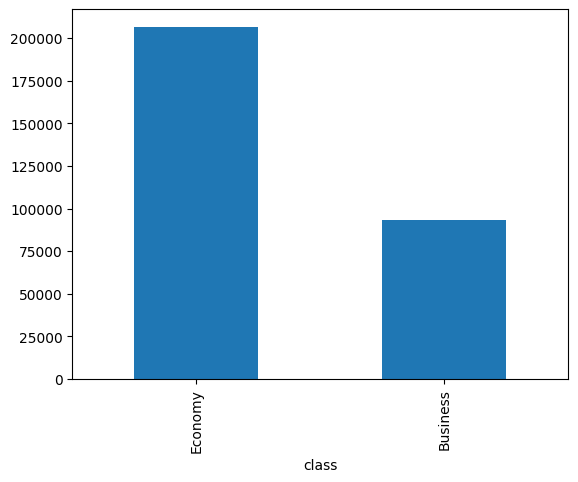

In [ ]:
data['class'].value_counts().plot(kind='bar')

Airline Count

<Axes: xlabel='airline'>

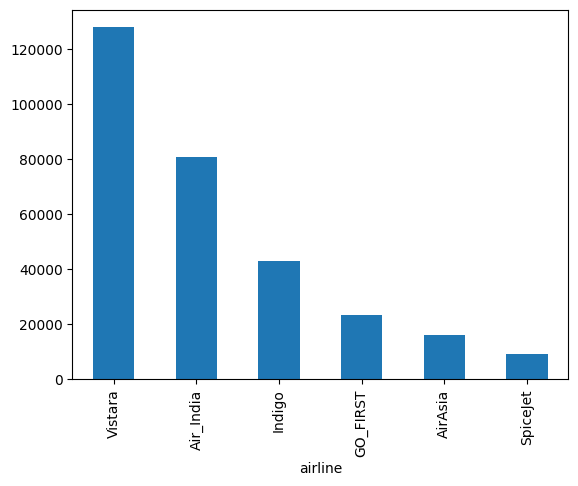

In [ ]:
data['airline'].value_counts().plot(kind='bar')

Source City Count

<Axes: xlabel='source_city'>

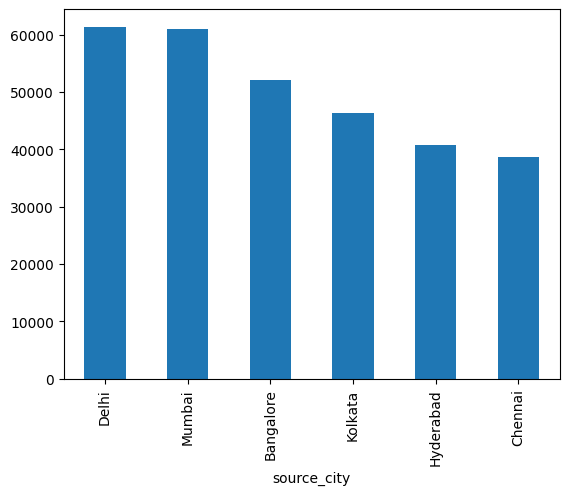

In [ ]:
data['source_city'].value_counts().plot(kind='bar')

Destination City Count

<Axes: xlabel='destination_city'>

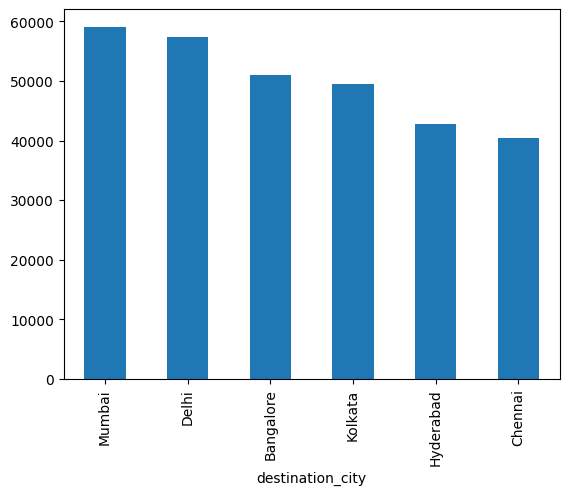

In [ ]:
data['destination_city'].value_counts().plot(kind='bar')

We can keep going with displaying all the counts but this should give us a good idea of what we have.

####Relationships

Visualize the relationship between price and airline

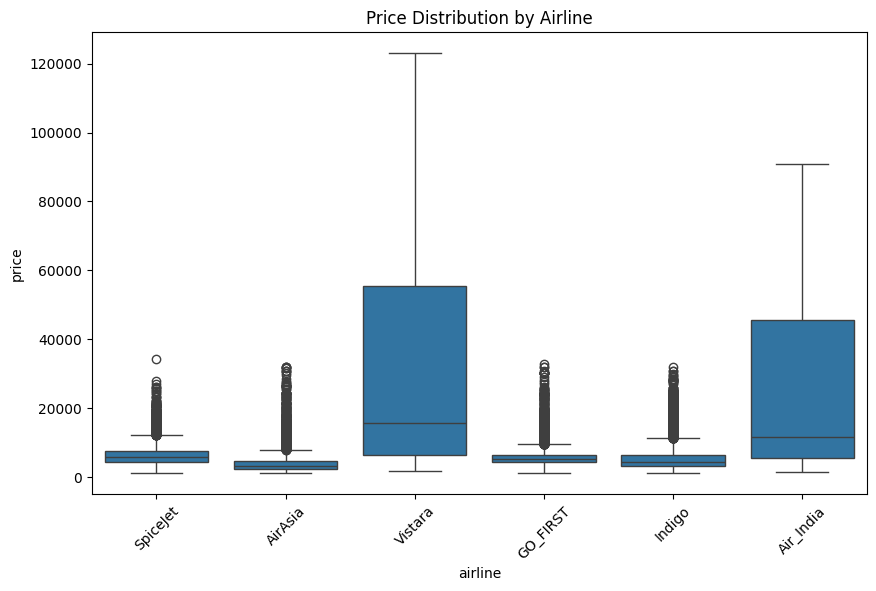

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Airline')
plt.show()

Visualize the distribution of price by departure time

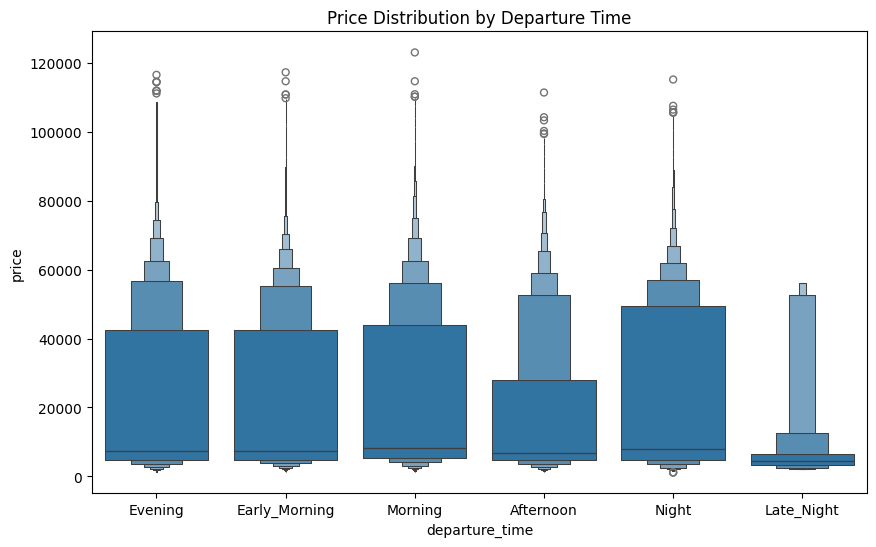

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='departure_time', y='price', data=data)
plt.title('Price Distribution by Departure Time')
plt.show()

Visualize the distribution of price by the number of stops

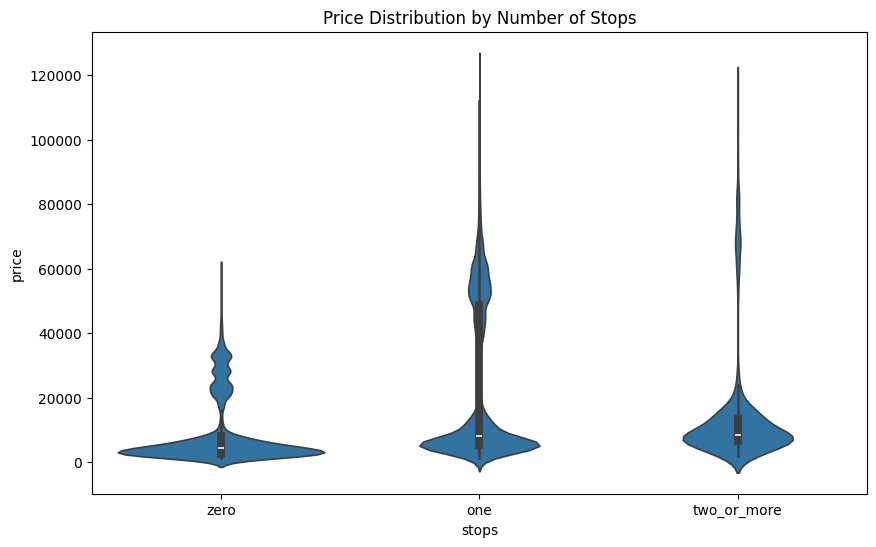

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='stops', y='price', data=data)
plt.title('Price Distribution by Number of Stops')
plt.show()

Visualize the average price by airline

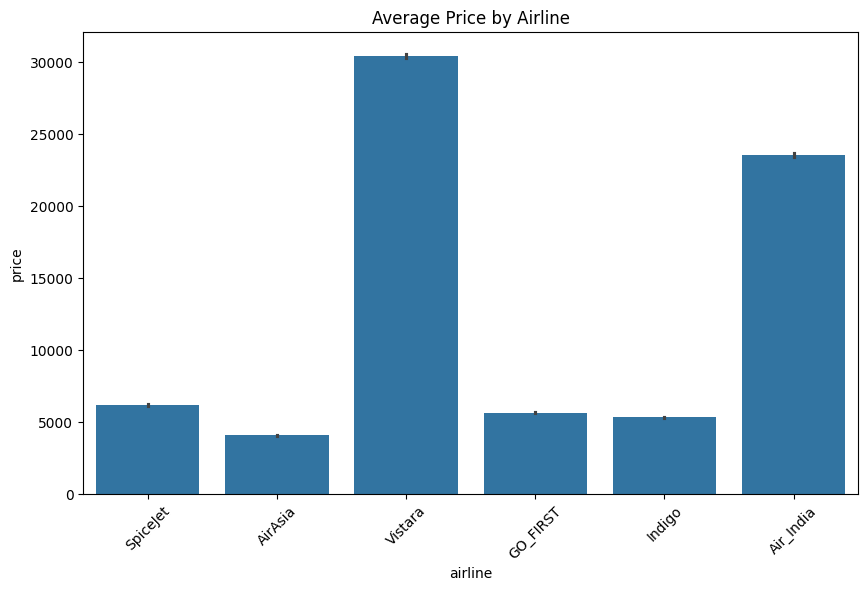

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Average Price by Airline')
plt.show()

Visualize the average price by source city

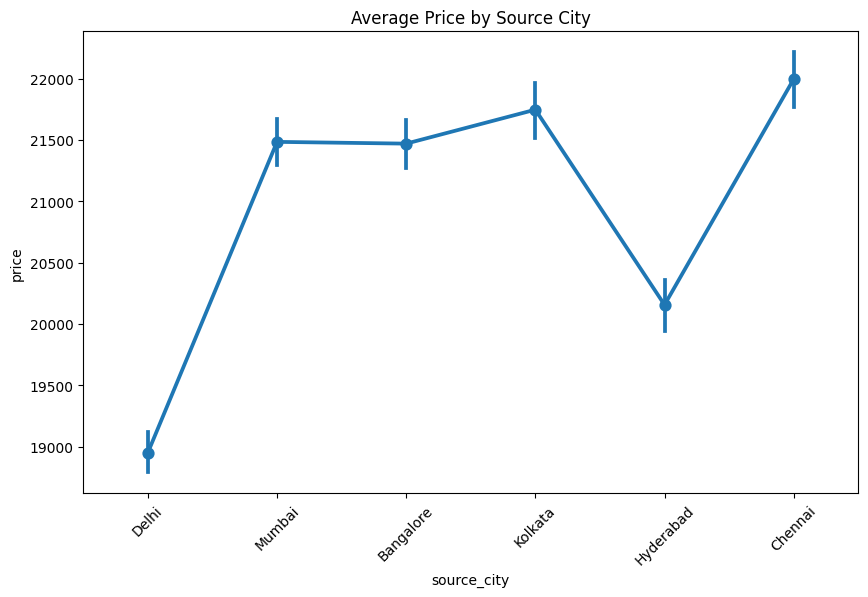

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='source_city', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Average Price by Source City')
plt.show()

Getting a wide range of combination of variables and styles of graphs can help us understand how the data behaves. The variety may also help different people understand in different ways.

Lastly some crosstabulation to display the distribution of certain features

In [ ]:
pd.crosstab(data['airline'], data['class'])

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


In [ ]:
pd.crosstab(data['airline'], data['source_city'])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3364,1498,4387,1844,2829,2176
Air_India,12052,9912,17063,11088,12400,18377
GO_FIRST,4498,1289,5724,2504,3590,5568
Indigo,7080,6746,8277,6215,7296,7506
SpiceJet,1255,1219,2524,332,1947,1734
Vistara,23812,18036,23368,18823,18285,25535


In [ ]:
pd.crosstab(data['airline'], data['destination_city'])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3437,1516,4433,1560,2789,2363
Air_India,11959,11141,14550,12022,13043,18177
GO_FIRST,4386,1488,5509,2576,3794,5420
Indigo,6772,6449,8133,6147,8437,7182
SpiceJet,1088,1172,2541,383,2054,1773
Vistara,23426,18602,22194,20038,19417,24182


###Explore Relationships Between Numerical Values

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='days_left', ylabel='price'>,
        <Axes: xlabel='duration', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='days_left'>,
        <Axes: xlabel='days_left', ylabel='days_left'>,
        <Axes: xlabel='duration', ylabel='days_left'>],
       [<Axes: xlabel='price', ylabel='duration'>,
        <Axes: xlabel='days_left', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>]], dtype=object)

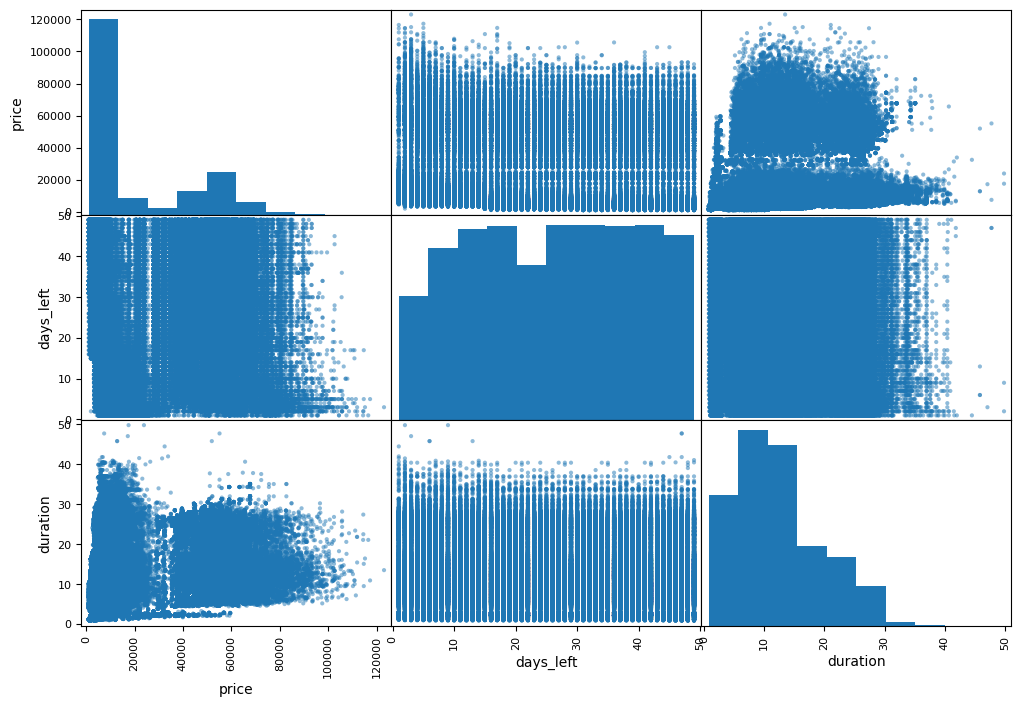

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "days_left","duration"]
scatter_matrix(data[attributes], figsize=(12, 8))

See relationship between price and duration

<Axes: xlabel='duration', ylabel='price'>

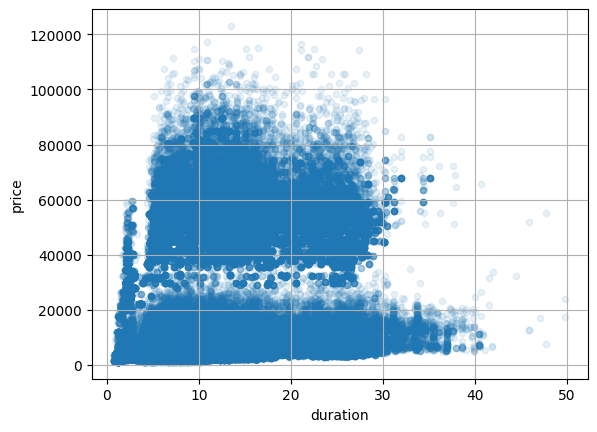

In [ ]:
data.plot(kind="scatter", x="duration", y="price",
             alpha=0.1, grid=True)

See relationship between price and days left

<Axes: xlabel='days_left', ylabel='price'>

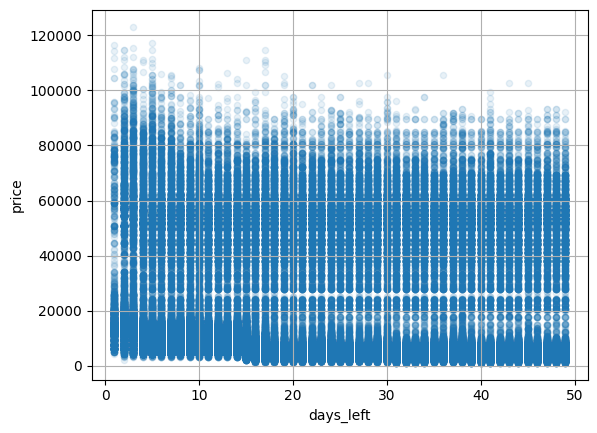

In [ ]:
data.plot(kind="scatter", x="days_left", y="price",
             alpha=0.1, grid=True)

See relationship between duration and days left

<Axes: xlabel='duration', ylabel='days_left'>

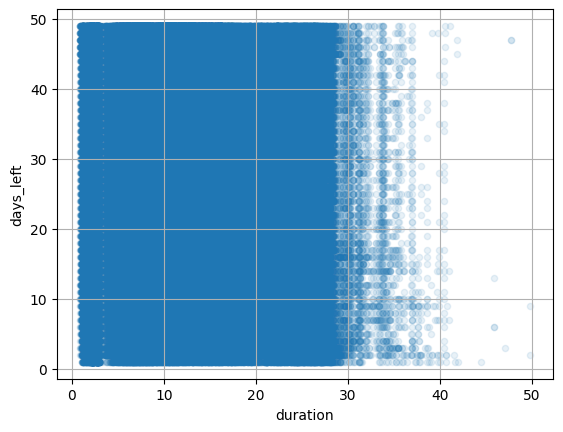

In [ ]:
data.plot(kind="scatter", x="duration", y="days_left",
             alpha=0.1, grid=True)

Since price is our taget variable I want to view some realtionships

<ipython-input-39-67cf3439a09c>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=8)


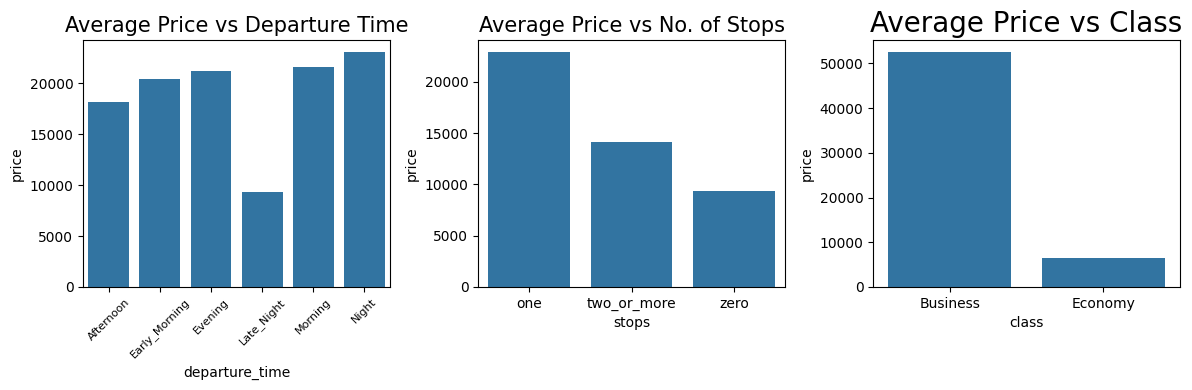

In [ ]:
# Calculate mean price by departure time
mean_price_departure = data.groupby('departure_time')['price'].mean().reset_index()

# Calculate mean price by stops
mean_price_stops = data.groupby('stops')['price'].mean().reset_index()

# Calculate mean price by class
mean_price_class = data.groupby('class')['price'].mean().reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,4))

ax1 = sns.barplot(data=mean_price_departure, x='departure_time', y='price', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=8)
ax1.set_title('Average Price vs Departure Time', size=15)

ax2 = sns.barplot(data=mean_price_stops, x='stops', y='price', ax=ax2)
ax2.set_title('Average Price vs No. of Stops', size=15)

ax3 = sns.barplot(data=mean_price_class, x='class', y='price', ax=ax3)
ax3.set_title('Average Price vs Class', size=20)

plt.tight_layout()
plt.show()

This helps us understand what kind of criteria is used to calculate the price of the flight. For example we can see that class clearly affects price as we usually does. The time of day for daparture also clearly affect the price. As well as the number of stops the flight takes.

##Feature Engeneering

Combining feature from the data set can help use create new relationships. This can help us understand how different number of features influence and work with eachother. Then visualizing it can paint a better picture.

Route is a feature that displays the source city and the destination city to see if specific flight paths influce price

In [ ]:
# Create the 'route' feature
data['route'] = data['source_city'] + ' to ' + data['destination_city']

# Display the first few rows to see the new feature
print(data[['source_city', 'destination_city', 'route']].head())

  source_city destination_city            route
0       Delhi           Mumbai  Delhi to Mumbai
1       Delhi           Mumbai  Delhi to Mumbai
2       Delhi           Mumbai  Delhi to Mumbai
3       Delhi           Mumbai  Delhi to Mumbai
4       Delhi           Mumbai  Delhi to Mumbai


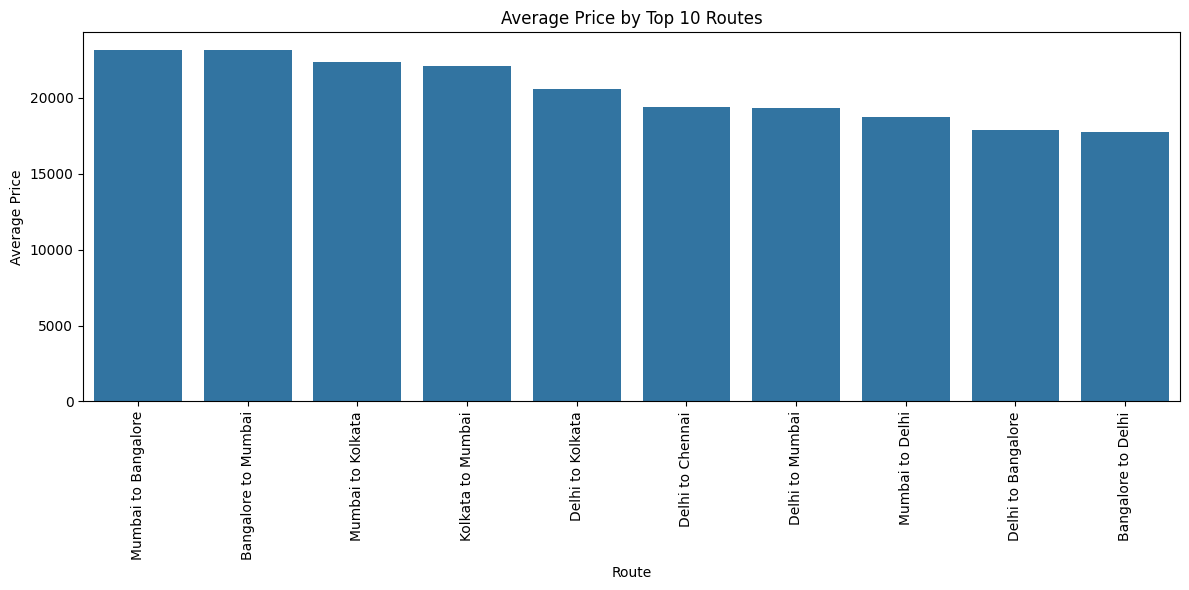

In [ ]:
# Calculate the average price for each route
mean_price_route = data.groupby('route')['price'].mean().reset_index()

# Get the top N most frequent routes (adjust N as needed)
top_n_routes = data['route'].value_counts().nlargest(10).index

# Filter the average price data for the top routes
mean_price_route_top = mean_price_route[mean_price_route['route'].isin(top_n_routes)]

# Sort for better visualization
mean_price_route_top = mean_price_route_top.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='route', y='price', data=mean_price_route_top)
plt.xticks(rotation=90)
plt.title('Average Price by Top 10 Routes')
plt.ylabel('Average Price')
plt.xlabel('Route')
plt.tight_layout()
plt.show()

This will help us visualize how each ariline prices their flights according to the class.

In [ ]:
# Create an interaction feature (string representation)
data['airline_class'] = data['airline'] + '_' + data['class']

# Display the first few rows
print(data[['airline', 'class', 'airline_class']].head())

    airline    class     airline_class
0  SpiceJet  Economy  SpiceJet_Economy
1  SpiceJet  Economy  SpiceJet_Economy
2   AirAsia  Economy   AirAsia_Economy
3   Vistara  Economy   Vistara_Economy
4   Vistara  Economy   Vistara_Economy


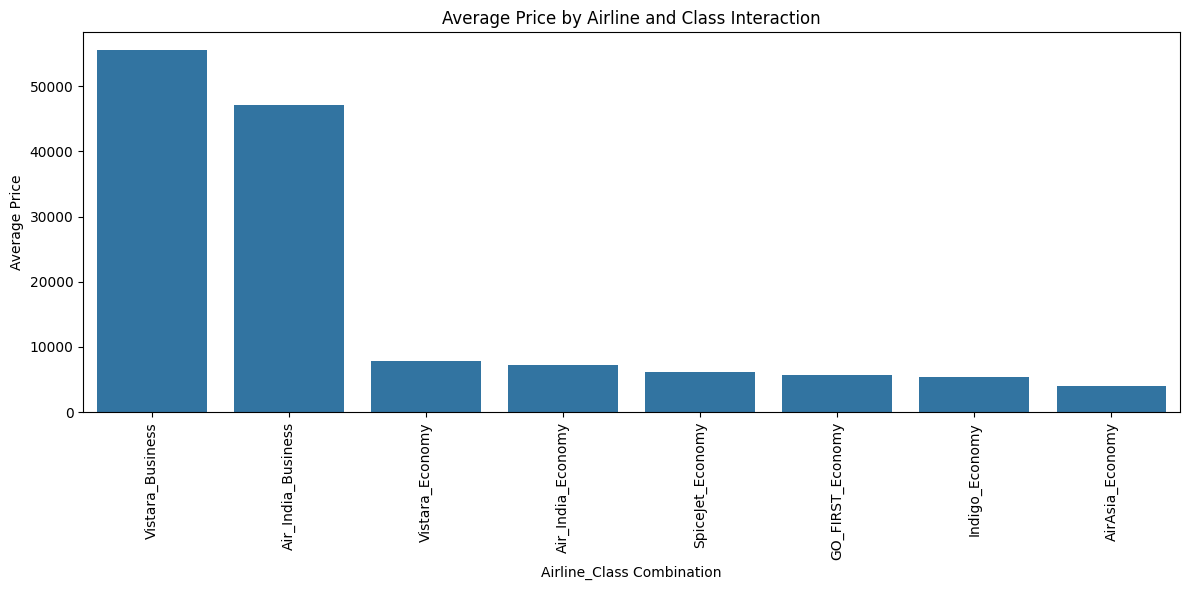

In [ ]:
# Calculate the average price for each airline_class combination
mean_price_airline_class = data.groupby('airline_class')['price'].mean().reset_index()

# Sort for better visualization (optional)
mean_price_airline_class = mean_price_airline_class.sort_values(by='price', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='airline_class', y='price', data=mean_price_airline_class)
plt.xticks(rotation=90)
plt.title('Average Price by Airline and Class Interaction')
plt.ylabel('Average Price')
plt.xlabel('Airline_Class Combination')
plt.tight_layout()
plt.show()

Earlier in the project we visualized something similar. This takes it a step further by implementing it as a feature to compare avarage price of business class and economy class flights.

In [ ]:
# Create a binary feature for 'Business' class
data['is_business_class'] = (data['class'] == 'Business').astype(int)

# Display the first few rows with the new feature
print(data[['class', 'is_business_class']].head())

     class  is_business_class
0  Economy                  0
1  Economy                  0
2  Economy                  0
3  Economy                  0
4  Economy                  0


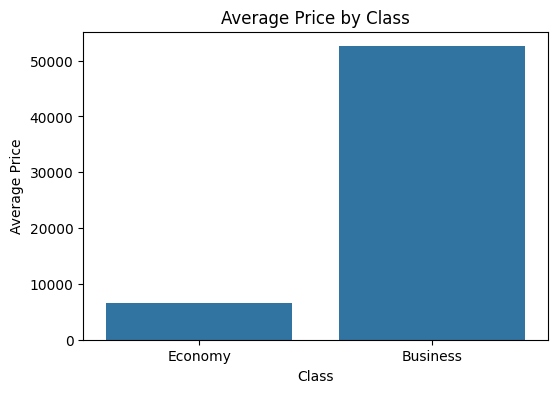

In [ ]:
# Calculate the average price for each value of the binary feature
mean_price_is_business = data.groupby('is_business_class')['price'].mean().reset_index()

# Map the 0/1 back to meaningful labels for the plot
mean_price_is_business['class_label'] = mean_price_is_business['is_business_class'].map({0: 'Economy', 1: 'Business'})

plt.figure(figsize=(6, 4))
sns.barplot(x='class_label', y='price', data=mean_price_is_business)
plt.title('Average Price by Class')
plt.ylabel('Average Price')
plt.xlabel('Class')
plt.show()

##Cleaning the Data

Cleaning the data up before visualizing is generally a good idea. This will help with accuracy and make working with the data a little bit more easy. This is because their might be null values that might mess with how we interpret certain features. Some methods dont work with categorical features so incoding them will be key. In this case we used methods that visualize the data using categorical values.

###Encoding categorical features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Define the categorical columns to encode
data_cat = data[["airline","flight","source_city",
                       "departure_time","stops","arrival_time",
                       "destination_city","class","route","airline_class","airline_grouped"
                       ]]

# Instantiate the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical data
# This is the missing step that creates the data_cat_encoded array
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

# Create a DataFrame for the encoded categorical features
# Now data_cat_encoded should have the same number of columns as data_cat
data_cat_encoded_df = pd.DataFrame(data_cat_encoded, columns=data_cat.columns)

# Drop the original categorical columns from the data DataFrame
data_numerical = data.drop(data_cat.columns, axis=1)

# Concatenate the numerical and encoded categorical DataFrames
data_encoded = pd.concat([data_numerical, data_cat_encoded_df], axis=1)

# Display the first few rows of the new DataFrame to verify the encoding
print(data_encoded.head())


   Unnamed: 0  duration  days_left  price  is_business_class  airline  flight  \
0           0      2.17          1   5953                  0      4.0  1408.0   
1           1      2.33          1   5953                  0      4.0  1387.0   
2           2      2.17          1   5956                  0      0.0  1213.0   
3           3      2.25          1   5955                  0      5.0  1559.0   
4           4      2.33          1   5955                  0      5.0  1549.0   

   source_city  departure_time  stops  arrival_time  destination_city  class  \
0          2.0             2.0    2.0           5.0               5.0    1.0   
1          2.0             1.0    2.0           4.0               5.0    1.0   
2          2.0             1.0    2.0           1.0               5.0    1.0   
3          2.0             4.0    2.0           0.0               5.0    1.0   
4          2.0             4.0    2.0           4.0               5.0    1.0   

   route  airline_class  airline

##Selecting Models

In this case we want to see how different models predict the price of the flights. For this we will be chose linear regression model and ensemble methods. Linear regression will serve as a simple and easily interpretable baseline. This does assume that their is a linear relationship which is why we will use it as a baseline.The ensemble methods will then help us improve accuracy, reduce variance and handle the more complex relationships

Training the linear regression model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'X_encoded' (your encoded features as a NumPy array)
# and 'y' (your target variable 'price') are already available from the previous step.
# If you prefer to use the DataFrame X_encoded_df, you can use that instead of X_encoded.

# Define X_encoded and y from the data_encoded DataFrame
# Ensure all columns in X_encoded are numerical
X_encoded = data_encoded.drop('price', axis=1) # X is the features, so drop the target
y = data_encoded['price'] # y is the target variable

# Split the data into training and testing sets
# We'll use a common split ratio, like 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) # Using a random_state for reproducibility

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Create a Linear Regression model instance
linear_reg_model = LinearRegression()

# Train the Linear Regression model on the training data
linear_reg_model.fit(X_train, y_train)


Shape of X_train: (240122, 15)
Shape of X_test: (60031, 15)
Shape of y_train: (240122,)
Shape of y_test: (60031,)


LinearRegression()

Testing our linear regression model

In [ ]:
# Make predictions on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model's performance
print("\nLinear Regression Model Evaluation:")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4631.02
Mean Squared Error (MSE): 49166375.58
Root Mean Squared Error (RMSE): 7011.87
R-squared (R2) Score: 0.90


training and testing our ensemble model

In [ ]:
# Install necessary libraries if you haven't already
!pip install scikit-learn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming data_encoded, X_train, X_test, y_train, and y_test are already defined
# from your previous steps after successful data encoding.

print("--- Ensemble Model Training and Evaluation ---")

# 1. Random Forest Regressor

print("\n--- Random Forest Regressor ---")

# Create a Random Forest Regressor model instance
# You can adjust parameters like n_estimators (number of trees)
# and random_state for reproducibility
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available CPU cores

# Train the Random Forest model on the training data
print("Training Random Forest model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest model training complete.")

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model's performance
print("\nRandom Forest Model Evaluation:")

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

# R-squared (R2) Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (R2) Score: {r2_rf:.2f}")

# 2. Gradient Boosting Regressor

print("\n--- Gradient Boosting Regressor ---")

# Create a Gradient Boosting Regressor model instance
# You can adjust parameters like n_estimators, learning_rate, etc.
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting model on the training data
print("Training Gradient Boosting model...")
gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting model training complete.")

# Make predictions on the test data
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model's performance
print("\nGradient Boosting Model Evaluation:")

# Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")

# Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")

# Root Mean Squared Error (RMSE)
rmse_gb = np.sqrt(mse_gb)
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")

# R-squared (R2) Score
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared (R2) Score: {r2_gb:.2f}")

# You can compare the evaluation metrics (MAE, RMSE, R2) of the Linear Regression,
# Random Forest, and Gradient Boosting models to see which one performs best on your test data.

--- Ensemble Model Training and Evaluation ---

--- Random Forest Regressor ---
Training Random Forest model...
Random Forest model training complete.

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 774.62
Mean Squared Error (MSE): 4601364.61
Root Mean Squared Error (RMSE): 2145.08
R-squared (R2) Score: 0.99

--- Gradient Boosting Regressor ---
Training Gradient Boosting model...
Gradient Boosting model training complete.

Gradient Boosting Model Evaluation:
Mean Absolute Error (MAE): 2648.58
Mean Squared Error (MSE): 20185837.71
Root Mean Squared Error (RMSE): 4492.87
R-squared (R2) Score: 0.96


##Comparing the Models

Based on the evaluation metrics calculated on the test set:

| Metric                | Linear Regression | Random Forest Regressor | Gradient Boosting Regressor |
| :-------------------- | :---------------- | :---------------------- | :-------------------------- |
| Mean Absolute Error   | 4631.02           | 774.62                  | 2648.58                     |
| Mean Squared Error    | 49166375.58       | 4601364.61              | 20185837.71                 |
| Root Mean Squared Error | 7011.87           | 2145.08                 | 4492.87                     |
| R-squared Score       | 0.90              | 0.99                    | 0.96                        |

**Comparison and Interpretation:**

Based on these metrics:

1.  **Mean Absolute Error (MAE):** The Random Forest Regressor has the significantly lowest MAE (774.62) compared to Linear Regression (4631.02) and Gradient Boosting (2648.58). This means, on average, the Random Forest model's predictions are closest to the actual prices.
2.  **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** Similarly, the Random Forest Regressor has the lowest MSE (4601364.61) and RMSE (2145.08). The much lower MSE and RMSE for Random Forest indicate that it makes smaller overall errors, especially reducing larger errors compared to the other two models.
3.  **R-squared (R2) Score:** The Random Forest Regressor has the highest R2 score (0.99). This means that the Random Forest model explains 99% of the variance in the flight prices in the test set. This is a very high R2 score and indicates a strong fit to the data. Gradient Boosting is also quite good at 0.96, while Linear Regression is the lowest at 0.90.

**Conclusion:**

Based on the evaluation metrics from the test set, the **Random Forest Regressor** is performing the best among the three models that were tested. It has the lowest error metrics (MAE, MSE, RMSE) and the highest R2 score, indicating that it is the most accurate and best-fitting model for predicting flight prices on this dataset compared to Linear Regression and Gradient Boosting.

While the Gradient Boosting model also performs much better than the simple Linear Regression model, the Random Forest model shows superior performance in this specific comparison.

##Conclusion

In this journal, we attempted to achieve end-to-end machine learning using a dataset of airplane ticket prices. Our goal was to explore, understand, and model flight prices based on various factors. The heavy emphasis on visualizing data was to get our intuition going to more easily understand the results of our models.

We began by loading the data and performing exploratory data analysis on the dataset. We examined the data's shape, checked for missing values and duplicates, and looked at the distribution of key features. Visualizations were a crucial part as stated before, as it allowed us to see relationships between categorical features like airline, source city, destination city, departure time, and stops, and the target variable, price. We also explored relationships between numerical features such as price, duration, and days left before the flight. These initial visualizations provided valuable insights into which factors heavily influence flight prices.

Following our exploration of the data, we atempted to do **feature engineering**, where we created new features like 'route'  and 'airline\_class'. We also created a binary 'is\_business\_class' feature. Visualizing the average price based on these new features helped confirm our intuition about certain relationships and revealed the impact of specific routes and the clear price difference between business and economy classes.

With a better understanding of the data and new features, we moved on to **data cleaning and preparation** by encoding categorical features into a numerical format suitable for machine learning models using OrdinalEncoder. This transformed our dataset, allowing us to proceed with model training. In other scenarios we might have had to impute the data when encountering null values. This is where maybe our end-to-end experience fell short. This is becuase in more real life cases null values are bound to happen and knowing how to deal with them is a crucial skill to have.

Finally, we **selected and trained different regression models** to predict flight prices: a simple Linear Regression model as a baseline, and two ensemble methods, Random Forest Regressor and Gradient Boosting Regressor. We split the data into training and testing sets to ensure our model evaluation was unbiased.

We **evaluated the performance** of each model on the test data using key metrics: Mean Absolute Error , Mean Squared Error, Root Mean Squared Error, and R-squared Score. Comparing these metrics revealed significant differences in the models' predictive capabilities.

Our comparison clearly showed that the **Random Forest Regressor** was the best between both the Linear Regression and Gradient Boosting models on this dataset. With the lowest MAE, MSE, and RMSE, and the highest R2 score, the Random Forest model demonstrated the strongest ability to accurately predict flight prices, explaining almost all of the variance in the test set.

In conclusion, this project successfully navigated the initial steps of a machine learning life cycle. We gained valuable insights through extensive exploration of the data and feature engineering, prepared the data for modeling, and identified the Random Forest Regressor as the best performing model among those tested for predicting flight prices based on the features of the data set. In the future maybe testing more data would be great as well as trying to tackle data that is not so clean and a little harder to work with.
